In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# 회귀 모델
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 회귀 성능 튜닝
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# 회귀 평가
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score

# 딥러닝
import tensorflow as tf

import warnings
warnings.filterwarnings(action='ignore') # pd 경고메시지 생략

In [2]:
# df = pd.read_csv('./data/df.csv')
df = joblib.load('./data/df.pkl')
df.head()

drop_col = '7days_waiting_time'
df = df.drop(drop_col, axis=1)

df = df.astype('float')

In [3]:
target = 'waiting_time'

x = df.drop(target, axis=1)
y = df.loc[:,target]

In [4]:
# 가변수화
dumm_cols = ['year','month','week','weekday','holiday']
x = pd.get_dummies(x, columns=dumm_cols, drop_first=True)

In [5]:
display(x.head(2))
display(y.head(2))

,car_cnt,request_cnt,ride_cnt,fare,distance,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),...,week_51.0,week_52.0,week_53.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,holiday_1.0
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01,213.0,1023.0,924.0,2427.0,10764.0,-2.0,-8.9,0.0,63.0,28.0,...,0,0,0,0,0,1,0,0,0,1
2015-01-02,420.0,3158.0,2839.0,2216.0,8611.0,2.4,-9.2,0.0,73.0,37.0,...,0,0,0,0,0,0,1,0,0,0


time
2015-01-01    23.2
2015-01-02    17.2
Name: waiting_time, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 92, shuffle=False)

x_train.head()

,car_cnt,request_cnt,ride_cnt,fare,distance,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),...,week_51.0,week_52.0,week_53.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,holiday_1.0
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01,213.0,1023.0,924.0,2427.0,10764.0,-2.0,-8.9,0.0,63.0,28.0,...,0,0,0,0,0,1,0,0,0,1
2015-01-02,420.0,3158.0,2839.0,2216.0,8611.0,2.4,-9.2,0.0,73.0,37.0,...,0,0,0,0,0,0,1,0,0,0
2015-01-03,209.0,1648.0,1514.0,2377.0,10198.0,8.2,0.2,0.0,89.0,58.0,...,0,0,0,0,0,0,0,1,0,1
2015-01-04,196.0,1646.0,1526.0,2431.0,10955.0,7.9,-0.9,0.0,95.0,52.0,...,0,0,0,0,0,0,0,0,1,1
2015-01-05,421.0,4250.0,3730.0,2214.0,8663.0,4.1,-7.4,3.4,98.0,29.0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# x_train, x_test, y_train, y_test = train_test_split(x.iloc[:,5:11],y, test_size= 92, shuffle=False)

In [8]:
x_train

,car_cnt,request_cnt,ride_cnt,fare,distance,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),...,week_51.0,week_52.0,week_53.0,weekday_1.0,weekday_2.0,weekday_3.0,weekday_4.0,weekday_5.0,weekday_6.0,holiday_1.0
time,,,,,,,,,,,,,,,,,,,,,
2015-01-01,213.0,1023.0,924.0,2427.0,10764.0,-2.0,-8.9,0.0,63.0,28.0,...,0,0,0,0,0,1,0,0,0,1
2015-01-02,420.0,3158.0,2839.0,2216.0,8611.0,2.4,-9.2,0.0,73.0,37.0,...,0,0,0,0,0,0,1,0,0,0
2015-01-03,209.0,1648.0,1514.0,2377.0,10198.0,8.2,0.2,0.0,89.0,58.0,...,0,0,0,0,0,0,0,1,0,1
2015-01-04,196.0,1646.0,1526.0,2431.0,10955.0,7.9,-0.9,0.0,95.0,52.0,...,0,0,0,0,0,0,0,0,1,1
2015-01-05,421.0,4250.0,3730.0,2214.0,8663.0,4.1,-7.4,3.4,98.0,29.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-26,642.0,5947.0,5039.0,2236.0,8529.0,27.7,14.1,0.0,86.0,33.0,...,0,0,0,0,0,0,0,0,0,0
2022-09-27,667.0,6044.0,5087.0,2238.0,8585.0,25.8,16.3,0.0,84.0,48.0,...,0,0,0,1,0,0,0,0,0,0
2022-09-28,670.0,6182.0,5176.0,2258.0,8751.0,26.3,16.5,0.0,92.0,36.0,...,0,0,0,0,1,0,0,0,0,0


# 머신러닝

In [9]:
LR_model = LinearRegression()
KN_model = KNeighborsRegressor()
Tree_model = DecisionTreeRegressor()
RanF_model = RandomForestRegressor()
xg_model = XGBRegressor()
lg_model = LGBMRegressor()

models = {'LR_model':LR_model,
        'KN_model':KN_model,
        'Tree_model':Tree_model,
        'RanF_model':RanF_model,
        'xg_model':xg_model,
        'lg_model':lg_model}

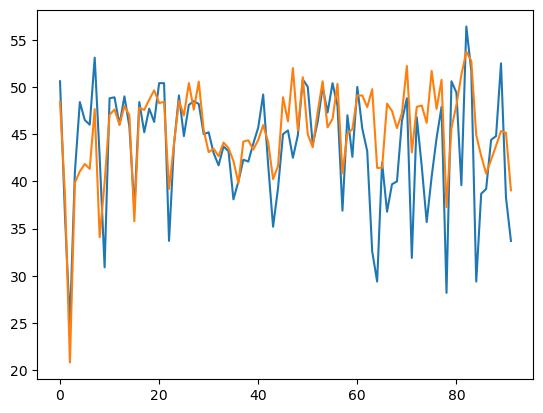

LR_model
MAE: 3.6528942177519723
MAPE: 0.09401200504295247
r2: 0.2924349906249316


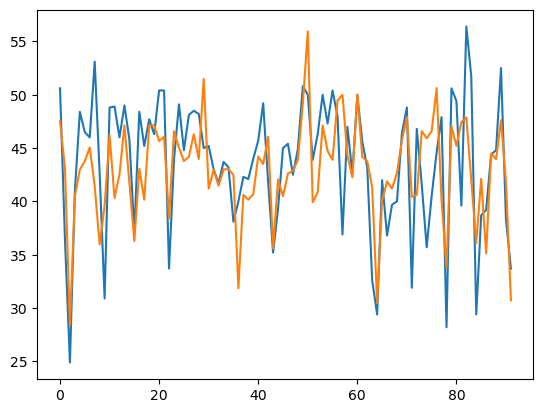

KN_model
MAE: 3.869347826086957
MAPE: 0.09227576659381302
r2: 0.37923278597131427


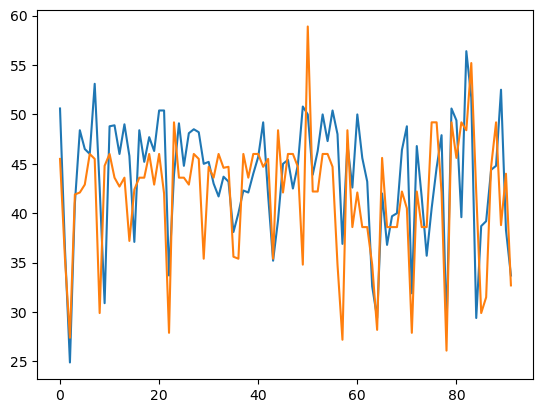

Tree_model
MAE: 4.59891304347826
MAPE: 0.10696362619595645
r2: 0.09961545284070727


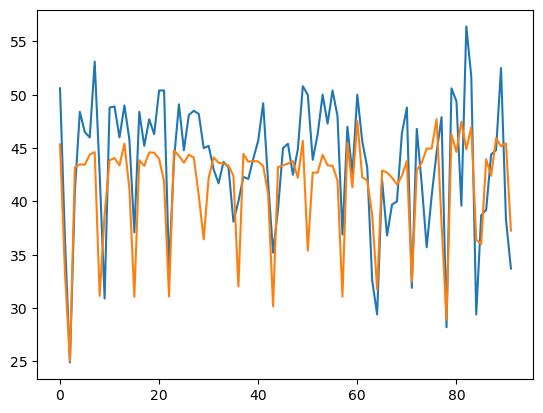

RanF_model
MAE: 4.094021739130439
MAPE: 0.09404131969355253
r2: 0.33488959961481846


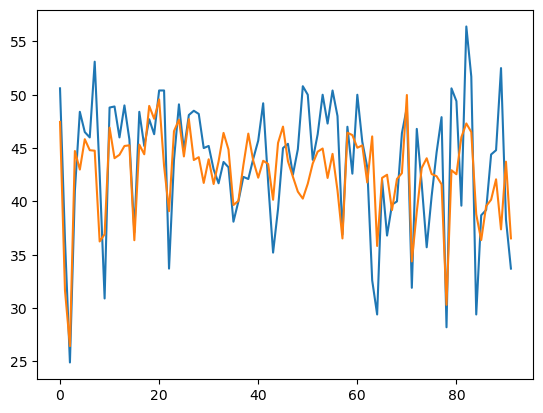

xg_model
MAE: 3.655454266589621
MAPE: 0.0855937064666454
r2: 0.3994210012946309
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000504 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2462
[LightGBM] [Info] Number of data points in the train set: 2831, number of used features: 87
[LightGBM] [Info] Start training from score 40.192794


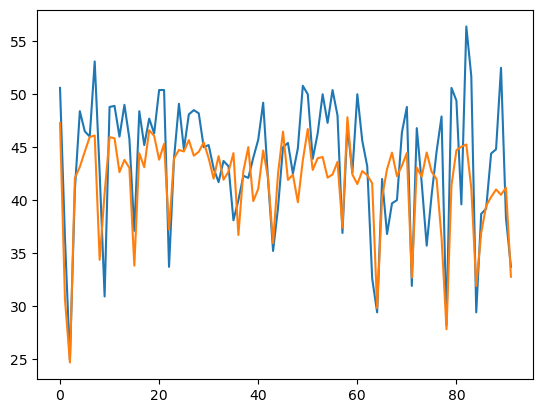

lg_model
MAE: 3.6000735258975345
MAPE: 0.0814122651463871
r2: 0.4236715067893774


In [10]:
results = []
for name, model in models.items():
    print("="*50)
    if model != 'KN_model':
        model.fit(x_train, y_train) # 모델 학습
        y_pred = model.predict(x_test) # 모델 예측
        model_mae = mae(y_test, y_pred)
        model_mape = mape(y_test, y_pred)
        model_r2 = r2_score(y_test, y_pred)
    else:
        model.fit(x_train_s, y_train)
        y_pred = model.predict(x_test_s)
        model_mae = mae(y_test, y_pred)
        model_mape = mape(y_test, y_pred)
        model_r2 = r2_score(y_test, y_pred)
        
    plt.plot(np.array(y_test))
    plt.plot(y_pred)
    plt.show()
    print(name)
    print('MAE:', model_mae)
    print('MAPE:', model_mape)
    print('r2:', model_r2)
    
    results.append([name, (model_mae, model_mape, model_r2)])

In [11]:
sorted(results, key=lambda x: x[1][2])

[['Tree_model', (4.59891304347826, 0.10696362619595645, 0.09961545284070727)],
 ['LR_model', (3.6528942177519723, 0.09401200504295247, 0.2924349906249316)],
 ['RanF_model', (4.094021739130439, 0.09404131969355253, 0.33488959961481846)],
 ['KN_model', (3.869347826086957, 0.09227576659381302, 0.37923278597131427)],
 ['xg_model', (3.655454266589621, 0.0855937064666454, 0.3994210012946309)],
 ['lg_model', (3.6000735258975345, 0.0814122651463871, 0.4236715067893774)]]

# 딥러닝

In [12]:
print(f"X shape : {x_train.shape}")
print(f"Y shape : {y_train.shape}")

X shape : (2831, 88)
Y shape : (2831,)


In [26]:
# 또 다른 딥러닝 모델
# 입력 레이어 정의
X = tf.keras.Input(shape=[88])

# 은닉 레이어 
H = tf.keras.layers.Dense(256)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

# 여기 부분이 skip connection 레이어층 쌓기 부분
for i in range(10):
    H1 = tf.keras.layers.Dropout(0.6)(H)
    H1 = tf.keras.layers.Dense(512)(H1)
    H1 = tf.keras.layers.BatchNormalization()(H1)
    H1 = tf.keras.layers.Activation("ReLU")(H1)
    
    H1 = tf.keras.layers.Dropout(0.6)(H1)
    H1 = tf.keras.layers.Dense(256)(H1)
    H1 = tf.keras.layers.BatchNormalization()(H1)
    H = tf.keras.layers.Add()([H,H1])
    H = tf.keras.layers.Activation("ReLU")(H)

# 출력 레이어 (회귀 모델이므로 활성화 함수는 'linear' 사용)
Y = tf.keras.layers.Dense(1, activation="linear")(H)

# 모델 생성
dp_model = tf.keras.Model(X, Y)
 
# 모델 컴파일 (손실 함수와 평가 지표 수정)
dp_model.compile(loss='mean_squared_error', metrics=['mean_absolute_error'], optimizer = 'Adam')

# 모델 요약
dp_model.summary()

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_8 (InputLayer)        [(None, 88)]                 0         []                            
                                                                                                  
 dense_227 (Dense)           (None, 256)                  22784     ['input_8[0][0]']             
                                                                                                  
 batch_normalization_220 (B  (None, 256)                  1024      ['dense_227[0][0]']           
 atchNormalization)                                                                               
                                                                                                  
 activation_220 (Activation  (None, 256)                  0         ['batch_normalization_22

 )                                                                                                
                                                                                                  
 dropout_217 (Dropout)       (None, 256)                  0         ['activation_226[0][0]']      
                                                                                                  
 dense_234 (Dense)           (None, 512)                  131584    ['dropout_217[0][0]']         
                                                                                                  
 batch_normalization_227 (B  (None, 512)                  2048      ['dense_234[0][0]']           
 atchNormalization)                                                                               
                                                                                                  
 activation_227 (Activation  (None, 512)                  0         ['batch_normalization_227[0][0
 )        

                                                                                                  
 dropout_224 (Dropout)       (None, 512)                  0         ['activation_233[0][0]']      
                                                                                                  
 dense_241 (Dense)           (None, 256)                  131328    ['dropout_224[0][0]']         
                                                                                                  
 batch_normalization_234 (B  (None, 256)                  1024      ['dense_241[0][0]']           
 atchNormalization)                                                                               
                                                                                                  
 add_100 (Add)               (None, 256)                  0         ['activation_232[0][0]',      
                                                                     'batch_normalization_234[0][0
          

                                                                                                  
 activation_240 (Activation  (None, 256)                  0         ['add_103[0][0]']             
 )                                                                                                
                                                                                                  
 dense_248 (Dense)           (None, 1)                    257       ['activation_240[0][0]']      
                                                                                                  
Total params: 2683905 (10.24 MB)
Trainable params: 2668033 (10.18 MB)
Non-trainable params: 15872 (62.00 KB)
__________________________________________________________________________________________________


In [27]:
# 콜백함수 만들기
early = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                        min_delta = 0, # 이보다 작게 변하면 변한다고 안할거임.
                                        patience = 15, # 이 회수(epoch)동안 개선이 없으면 끝냄
                                        restore_best_weights=True)
# 모델 학습
result = dp_model.fit(x_train, y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=[early])

Epoch 1/1000
71/71 [==============================] - 13s 52ms/step - loss: 785.3690 - mean_absolute_error: 22.2255 - val_loss: 1114.6954 - val_mean_absolute_error: 30.0791
Epoch 2/1000
71/71 [==============================] - 3s 40ms/step - loss: 154.2474 - mean_absolute_error: 9.3828 - val_loss: 527.3376 - val_mean_absolute_error: 20.1934
Epoch 3/1000
71/71 [==============================] - 3s 41ms/step - loss: 122.8177 - mean_absolute_error: 8.3343 - val_loss: 219.6262 - val_mean_absolute_error: 11.8252
Epoch 4/1000
71/71 [==============================] - 3s 41ms/step - loss: 103.7539 - mean_absolute_error: 7.6862 - val_loss: 187.8280 - val_mean_absolute_error: 10.3381
Epoch 5/1000
71/71 [==============================] - 3s 42ms/step - loss: 103.2614 - mean_absolute_error: 7.4962 - val_loss: 98.3223 - val_mean_absolute_error: 7.6398
Epoch 6/1000
71/71 [==============================] - 3s 45ms/step - loss: 92.8656 - mean_absolute_error: 7.1167 - val_loss: 46.8825 - val_mean_absol

Epoch 50/1000
71/71 [==============================] - 3s 46ms/step - loss: 61.8961 - mean_absolute_error: 5.6868 - val_loss: 15.2706 - val_mean_absolute_error: 2.9138


In [30]:
# 모델 평가하기
dp_model.evaluate(x_test, y_test)

3/3 [==============================] - 0s 11ms/step - loss: 15.5237 - mean_absolute_error: 3.0539


[15.523730278015137, 3.0538549423217773]

In [31]:
# 예측하기
y_pred = dp_model.predict(x_test)

print('MAE:', mae(y_test, y_pred))
print('MAPE:', mape(y_test, y_pred))
print('r2_score:', r2_score(y_test, y_pred))

3/3 [==============================] - 0s 9ms/step
MAE: 3.0538552408633013
MAPE: 0.07366554140782941
r2_score: 0.5837993900313219


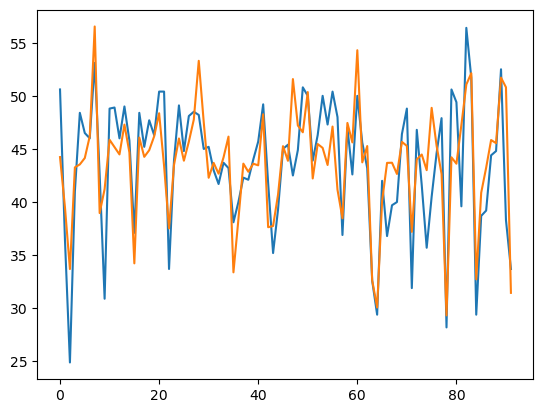

In [32]:
plt.plot(np.array(y_test))
plt.plot(y_pred)
plt.show()